# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np
import pandas as pd
import random

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here

# there is the temperature of 7 cities, the mean is 15 degres, 
# the min is 3 degrees and the max is 22 degrees. 
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


In [5]:
print(type("Temparute"))

<class 'str'>


#### Select the rows where state is New York

In [6]:
# your answer here
ny_temp = temp[temp['State'] == 'New York']
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
ny_temp.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
above_15 = temp[temp['Temperature'] > 15 ]
above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# your answer here
above_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# your answer here
above_15_20 = temp[temp['Temperature'].between(15.01,19.99)]
above_15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# your answer here
ny_temp = temp[temp['State'] == 'New York']
ny_temp.mean()

Temperature    10.740741
dtype: float64

In [12]:
co_temp = temp[temp['State'] == 'Connecticut']
co_temp.mean()

Temperature    15.833333
dtype: float64

In [13]:
nw_temp = temp[temp['State'] == 'New Jersey']
nw_temp.mean()

Temperature    21.111111
dtype: float64

In [14]:
temp_state = temp.groupby('State')['Temperature'].mean().reset_index()
temp_state
temp_state_1 = temp_state.rename(columns={'Temperature' : 'Mean'})
temp_state_1

,State,Mean
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [57]:
temp_state_2 = temp.groupby('State')['Temperature'].std().reset_index()
temp_state_2 = temp_state_2.rename(columns={'Temperature' : 'Standard Deviation'})
temp_state_2

,State,Standard Deviation
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


In [58]:
temp_state_1.merge(temp_state_2)

,State,Mean,Standard Deviation
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [60]:
# your answer here
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [61]:
# your answer here
# 9 employees in the data base, average salary is 49 and average years are 4
# min salary is 30 and year is 1, max salary is 70 and max years is 8
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

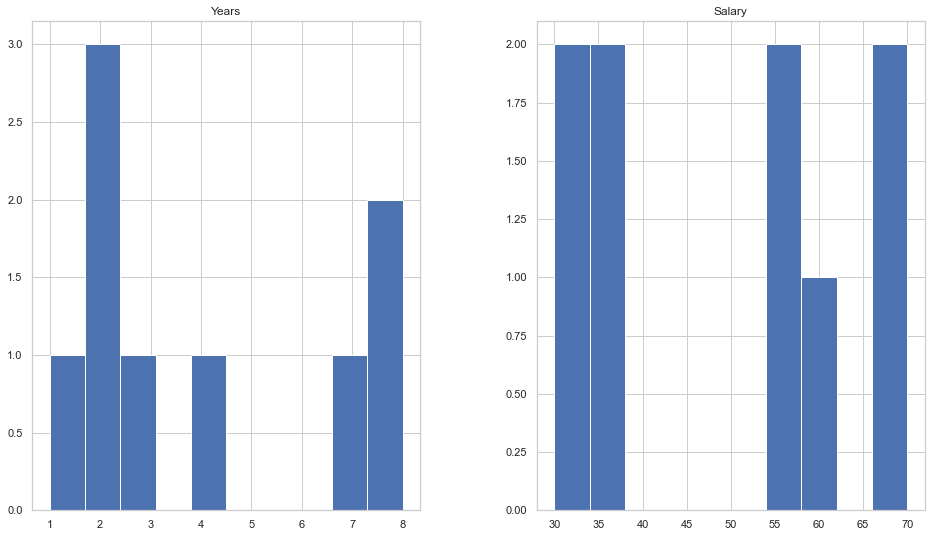

In [68]:
# your answer here

# The biggest category in terms of years is 3 years and 2 employees have been
# here for 9 years. For the salary gap between 30-35 k salaries and
# 55-70k salaries 
employee.hist()

#### What's the average salary in this company?

In [70]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [71]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [78]:
# your answer here
minimum = employee.Salary.min()

#### Who are the employees with the lowest salary?

In [79]:
# your answer here
lo_employee = employee[employee['Salary'] == minimum]
lo_employee

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [75]:
# your answer here
name_David = employee[employee['Name'] == 'David']
name_David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [86]:
# your answer here
david_salary = name_David['Salary']
david_salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [81]:
# your answer here
associate = employee[employee['Title'] == 'associate']
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [82]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [87]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [101]:
# your answer here
asso_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
asso_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [118]:
# your answer here
employee_years = employee.groupby(['Years'])
employee_years = employee.sort_values(by=['Years'])
employee_years

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55
4,Samuel,Sales,Master,M,associate,3,55
3,Sonia,HR,Bachelor,F,analyst,4,35
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [120]:
employee.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [124]:
# your answer here
associate = employee[employee['Title'] == 'associate']
associate.mean()

Years      4.000000
Salary    56.666667
dtype: float64

In [125]:
analyst = employee[employee['Title'] == 'analyst']
analyst.mean()

Years      2.25
Salary    32.50
dtype: float64

In [128]:
vp = employee[employee['Title'] == 'VP']
vp.mean()

Years      8.0
Salary    70.0
dtype: float64

In [129]:
employee.groupby('Title').mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:title={'center':'Years'}, xlabel='Salary'>

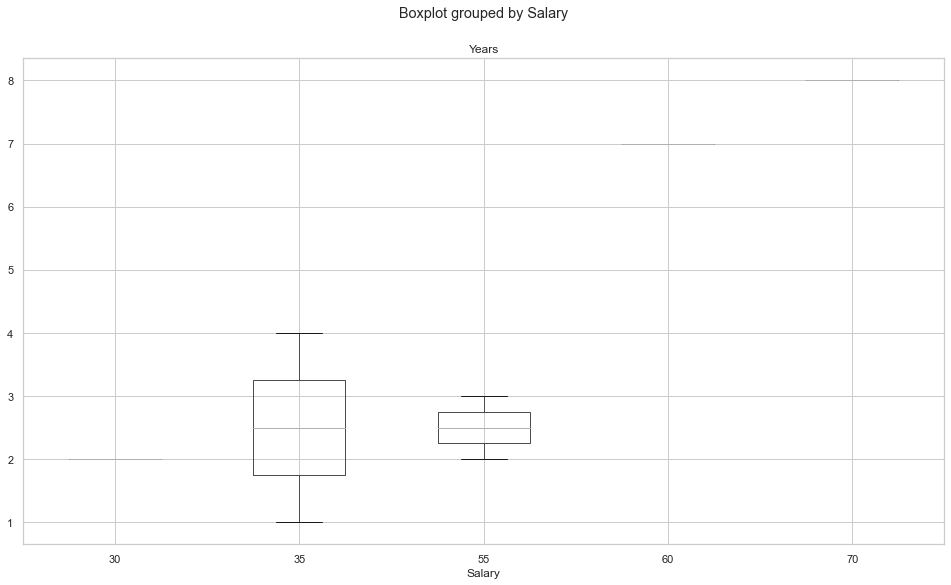

In [130]:
# draw boxplot here
employee.boxplot(by='Salary', column = ['Years'], grid = True)

In [135]:
# print first quartile here
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [136]:
# print third quartile here
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [140]:
# your answer here
female = employee[employee['Gender'] == 'F']
female.mean()

Years      4.0
Salary    47.5
dtype: float64

In [141]:
male = employee[employee['Gender'] == 'M']
male.mean()

Years      4.2
Salary    50.0
dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [146]:
# your answer here
employee.groupby("Department").mean()


,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [147]:
employee.groupby("Department").min()


,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


In [148]:
employee.groupby("Department").max()


,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [149]:
# 
employee.groupby("Department").describe()


Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [36]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [155]:
# your answer here

orders = pd.read_csv('Orders.zip')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [158]:
# your answer here

orders.describe()

#invoice, year, month, day, hour, customerID not really interesting 
# to have a look at

# Quantity, UnitPrice and amont spent yes => compared to the two previous 
# DS, the distribution is bigger

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [159]:
type(orders)

pandas.core.frame.DataFrame

####  What is the average Purchase Price?

In [162]:
# your answer here
orders["amount_spent"].mean()


22.39474850474768

#### What were the highest and lowest purchase prices? 

In [163]:
# your answer here
orders["amount_spent"].max()


168469.6

In [165]:
# your answer here
orders["amount_spent"].min()


0.0

#### Select all the customers we have in Spain

In [167]:
# your answer here
spain = orders[orders['Country'] == 'Spain']
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [178]:
# your answer here
value_counts = spain.value_counts('CustomerID')
value_counts

CustomerID
12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12450      8
12547      8
12548      5
12445      4
dtype: int64

In [179]:
len(value_counts)

30

#### Select all the customers who have bought more than 50 items ?

In [171]:
# your answer here
items = orders[orders['Quantity'] > 50]
items

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [183]:
# your answer here
items_Spain = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
items_Spain
                     


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [185]:
# your answer here
items_free = orders[orders['amount_spent'] == 0]
items_free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [189]:
# your answer here
lunch_bag = orders[orders['Description'].str.contains('.*lunch bag.*')]
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [191]:
# your answer here
year_2011 = lunch_bag[lunch_bag["year"] == 2011]
year_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

(-10.0, 250.0)

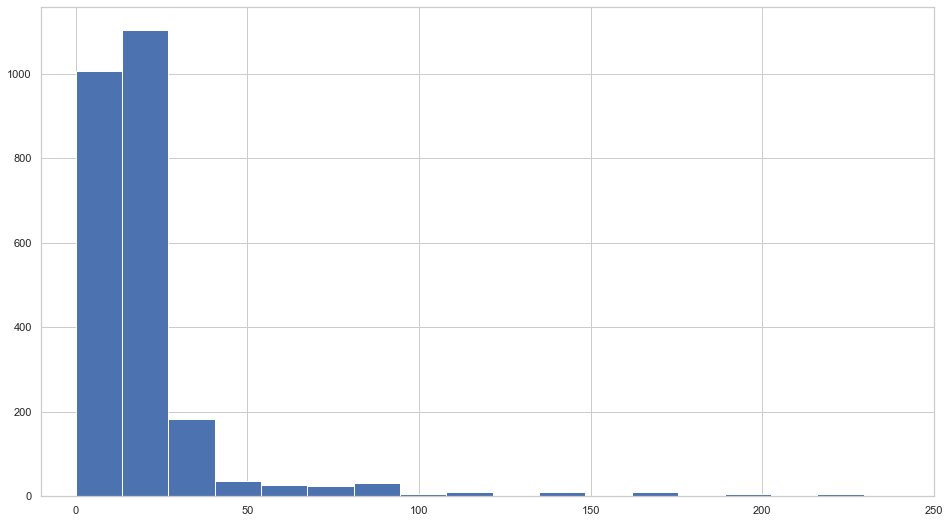

In [200]:
# your answer here
spain["amount_spent"].hist(bins = 100)
plt.xlim(xmin = -10, xmax = 250)


#### Select all orders made in the month of August

In [201]:
# your answer here
august = orders[orders['month'] == 9]
august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
226488,320705,565080,20677,2011,9,4,8,pink polkadot bowl,8,2011-09-01 08:25:00,1.25,13509,United Kingdom,10.0
226489,320706,565080,22128,2011,9,4,8,party cones candy assorted,24,2011-09-01 08:25:00,1.25,13509,United Kingdom,30.0
226490,320708,565082,22423,2011,9,4,9,regency cakestand 3 tier,2,2011-09-01 09:15:00,12.75,13305,United Kingdom,25.5
226491,320709,565082,15060B,2011,9,4,9,fairy cake design umbrella,8,2011-09-01 09:15:00,3.75,13305,United Kingdom,30.0
226492,320710,565082,23245,2011,9,4,9,set of 3 regency cake tins,4,2011-09-01 09:15:00,4.95,13305,United Kingdom,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266513,370675,569148,22113,2011,9,5,15,grey heart hot water bottle,4,2011-09-30 15:52:00,4.25,16613,United Kingdom,17.0
266514,370676,569148,84030E,2011,9,5,15,english rose hot water bottle,4,2011-09-30 15:52:00,4.25,16613,United Kingdom,17.0
266515,370677,569148,22867,2011,9,5,15,hand warmer bird design,12,2011-09-30 15:52:00,2.10,16613,United Kingdom,25.2
266516,370678,569148,23439,2011,9,5,15,hand warmer red love heart,12,2011-09-30 15:52:00,2.10,16613,United Kingdom,25.2


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [208]:
# your answer here
value_counts = august.groupby("Country").count()
value_counts

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,,,,
Australia,102,102,102,102,102,102,102,102,102,102,102,102,102
Belgium,184,184,184,184,184,184,184,184,184,184,184,184,184
Channel Islands,65,65,65,65,65,65,65,65,65,65,65,65,65
Cyprus,1,1,1,1,1,1,1,1,1,1,1,1,1
Denmark,46,46,46,46,46,46,46,46,46,46,46,46,46
EIRE,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075
Finland,33,33,33,33,33,33,33,33,33,33,33,33,33
France,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
Germany,773,773,773,773,773,773,773,773,773,773,773,773,773


#### What's the  average amount of money spent by country

In [211]:
# your answer here
mean_country = orders.groupby("Country").mean()
mean_country

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,224857.287764,556217.951055,2010.972996,6.062447,3.354430,11.398312,71.062447,3.048523,12454.454008,116.895620
Austria,297239.085427,562367.633166,2010.979899,7.623116,2.778894,12.170854,12.263819,4.256030,12519.097990,25.624824
Bahrain,184964.000000,552790.411765,2011.000000,5.000000,1.705882,13.941176,15.294118,4.644118,12354.529412,32.258824
Belgium,276657.968981,560543.014279,2010.953225,7.404727,3.671098,12.225997,11.441162,3.630158,12430.675037,20.283772
Brazil,157314.500000,550201.000000,2011.000000,4.000000,5.000000,10.000000,11.125000,4.456250,12769.000000,35.737500
Canada,240605.867550,557964.476821,2011.000000,6.377483,1.139073,9.867550,18.298013,6.030331,17321.079470,24.280662
Channel Islands,255107.524064,558786.728610,2010.977273,6.791444,3.437166,10.994652,12.688503,4.531618,14890.822193,27.340160
Cyprus,236759.193811,556821.771987,2010.864821,7.311075,3.312704,12.024430,10.359935,5.710391,12405.381107,22.134169
Czech Republic,215563.200000,555053.600000,2011.000000,5.200000,2.600000,8.800000,26.840000,3.130800,12781.000000,33.069600


In [215]:
average_country = orders.groupby("Country")["amount_spent"].mean()
average_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [212]:
# your answer here
orders["UnitPrice"].max()

8142.75

In [219]:
expensive_unit = orders[["Description", "UnitPrice"]].max()
expensive_unit

Description    zinc wire sweetheart letter tray
UnitPrice                               8142.75
dtype: object

#### What was the average amount spent per year ?

In [222]:
# your answer here
gro = orders.groupby("year").mean("amount_spent")
gro

,Unnamed: 0,InvoiceNo,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
year,,,,,,,,,
2010,19884.040482,538009.305122,12.000000,3.745528,12.897630,11.937309,3.132095,15529.088417,21.892733
2011,296660.861310,562207.976246,7.303803,3.605338,12.716328,13.098138,3.115054,15277.794830,22.430074
